In [1]:
%%time
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

Wall time: 17.8 s


In [2]:
%%time
connection = sqlite3.connect("data/wildfire.sqlite")
sql = "select * from fires"
#Df with 
firesfull = pd.read_sql_query(sql, connection)
fires = pd.read_sql_query(
    "select NWCG_REPORTING_AGENCY, CONT_DATE - DISCOVERY_DATE as CONT_TIME, CONT_DOY, \
    LONGITUDE, LATITUDE, SOURCE_SYSTEM_TYPE, DISCOVERY_DATE, FIRE_YEAR,\
    DISCOVERY_DOY, STAT_CAUSE_DESCR, FIRE_SIZE, OWNER_CODE from fires", connection)

Wall time: 5min 34s


In [3]:
firesfull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 39 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_FIRE_REPORT_ID        object 
 11  LOCAL_INCIDENT_ID           object 
 12  FIRE_CODE                   object 
 13  FIRE_NAME                   object 
 14  ICS_209_INCIDENT_NUMBER     object 
 15  ICS_209_NAME                object 
 16  MTBS_ID                     object 
 17  MTBS_FIRE_NAME              object 
 18  COMPLEX_NAME                object 
 19  FIRE_YEAR            

In [4]:
#Percentage of Null values for each column
100*firesfull.isnull().sum()/len(firesfull) 

OBJECTID                       0.000000
FOD_ID                         0.000000
FPA_ID                         0.000000
SOURCE_SYSTEM_TYPE             0.000000
SOURCE_SYSTEM                  0.000000
NWCG_REPORTING_AGENCY          0.000000
NWCG_REPORTING_UNIT_ID         0.000000
NWCG_REPORTING_UNIT_NAME       0.000000
SOURCE_REPORTING_UNIT          0.000000
SOURCE_REPORTING_UNIT_NAME     0.000000
LOCAL_FIRE_REPORT_ID          77.602402
LOCAL_INCIDENT_ID             43.649895
FIRE_CODE                     82.726134
FIRE_NAME                     50.901718
ICS_209_INCIDENT_NUMBER       98.632413
ICS_209_NAME                  98.632413
MTBS_ID                       99.414879
MTBS_FIRE_NAME                99.414879
COMPLEX_NAME                  99.724377
FIRE_YEAR                      0.000000
DISCOVERY_DATE                 0.000000
DISCOVERY_DOY                  0.000000
DISCOVERY_TIME                46.937220
STAT_CAUSE_CODE                0.000000
STAT_CAUSE_DESCR               0.000000


In [5]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   NWCG_REPORTING_AGENCY  object 
 1   CONT_TIME              float64
 2   CONT_DOY               float64
 3   LONGITUDE              float64
 4   LATITUDE               float64
 5   SOURCE_SYSTEM_TYPE     object 
 6   DISCOVERY_DATE         float64
 7   FIRE_YEAR              int64  
 8   DISCOVERY_DOY          int64  
 9   STAT_CAUSE_DESCR       object 
 10  FIRE_SIZE              float64
 11  OWNER_CODE             float64
dtypes: float64(7), int64(2), object(3)
memory usage: 172.2+ MB


In [6]:
#Percentage of Null values for columns used in training models 
100*fires.isnull().sum()/len(fires) 

NWCG_REPORTING_AGENCY     0.000000
CONT_TIME                47.410135
CONT_DOY                 47.410135
LONGITUDE                 0.000000
LATITUDE                  0.000000
SOURCE_SYSTEM_TYPE        0.000000
DISCOVERY_DATE            0.000000
FIRE_YEAR                 0.000000
DISCOVERY_DOY             0.000000
STAT_CAUSE_DESCR          0.000000
FIRE_SIZE                 0.000000
OWNER_CODE                0.000000
dtype: float64

<AxesSubplot:xlabel='count', ylabel='STAT_CAUSE_DESCR'>

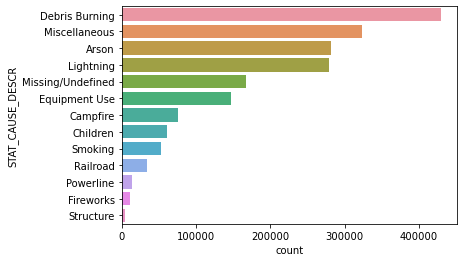

In [7]:
#Value counts per fire type
sns.countplot(y = fires['STAT_CAUSE_DESCR'], order = list(fires['STAT_CAUSE_DESCR'].value_counts().index))  

In [8]:
#Dropping Miscellaneous and Missing/Undefined
fires2 = fires[(fires["STAT_CAUSE_DESCR"] != "Missing/Undefined") & (fires["STAT_CAUSE_DESCR"] != "Miscellaneous")]

<AxesSubplot:>

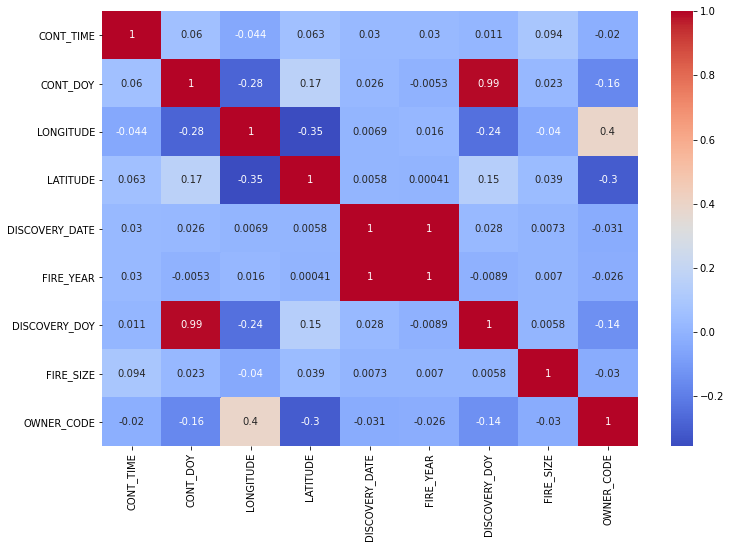

In [9]:
#Correlation between quanitiative variables
plt.figure(figsize=(12,8))  
sns.heatmap(fires.corr(), cmap='coolwarm', annot=True)  

<AxesSubplot:xlabel='SOURCE_SYSTEM_TYPE', ylabel='count'>

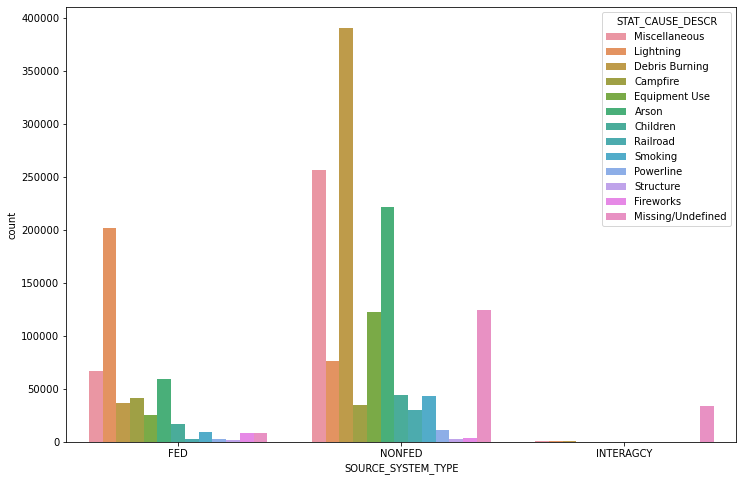

In [10]:
plt.figure(figsize=(12,8))  
sns.countplot(x='SOURCE_SYSTEM_TYPE', data=fires, hue='STAT_CAUSE_DESCR')

<AxesSubplot:xlabel='NWCG_REPORTING_AGENCY', ylabel='count'>

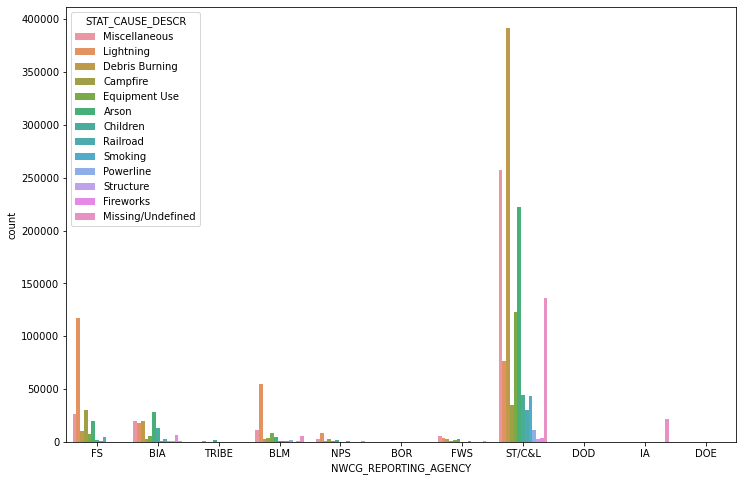

In [11]:
plt.figure(figsize=(12,8))  
sns.countplot(x='NWCG_REPORTING_AGENCY', data=fires, hue='STAT_CAUSE_DESCR')

<AxesSubplot:xlabel='OWNER_CODE', ylabel='count'>

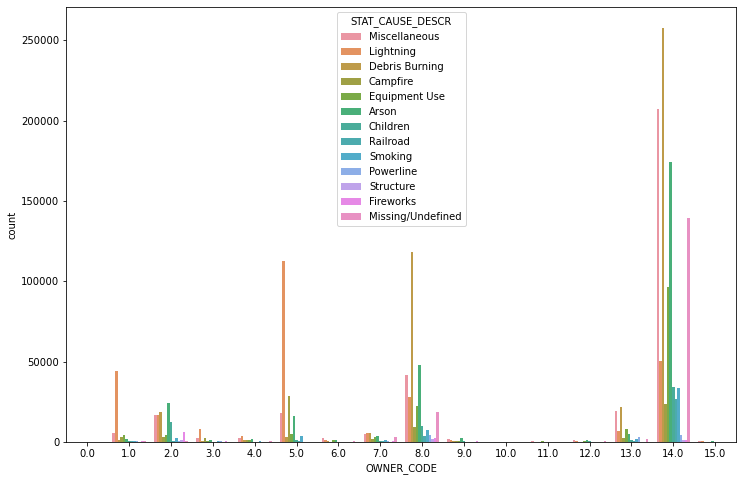

In [12]:
plt.figure(figsize=(12,8))  
sns.countplot(x='OWNER_CODE', data=fires, hue='STAT_CAUSE_DESCR')

In [13]:
#Creating new columns to find correlations between qunatitive variables and each fire type
fires['Lightning']=(fires['STAT_CAUSE_DESCR']=='Lightning').astype(int) 
fires['Debris Burning']=(fires['STAT_CAUSE_DESCR']=='Debris Burning').astype(int) 
fires['Campfire']=(fires['STAT_CAUSE_DESCR']=='Campfire').astype(int) 
fires['Equipment Use']=(fires['STAT_CAUSE_DESCR']=='Equipment Use').astype(int) 
fires['Arson']=(fires['STAT_CAUSE_DESCR']=='Arson').astype(int) 
fires['Children']=(fires['STAT_CAUSE_DESCR']=='Children').astype(int) 
fires['Railroad']=(fires['STAT_CAUSE_DESCR']=='Railroad').astype(int) 
fires['Smoking']=(fires['STAT_CAUSE_DESCR']=='Smoking').astype(int) 
fires['Powerline']=(fires['STAT_CAUSE_DESCR']=='Powerline').astype(int) 
fires['Structure']=(fires['STAT_CAUSE_DESCR']=='Structure').astype(int) 
fires['Fireworks']=(fires['STAT_CAUSE_DESCR']=='Fireworks').astype(int) 

In [14]:
fires2['STAT_CAUSE_DESCR'].unique()

array(['Lightning', 'Debris Burning', 'Campfire', 'Equipment Use',
       'Arson', 'Children', 'Railroad', 'Smoking', 'Powerline',
       'Structure', 'Fireworks'], dtype=object)

## Correlation Between Quanitative Variables and Fire Types

<AxesSubplot:>

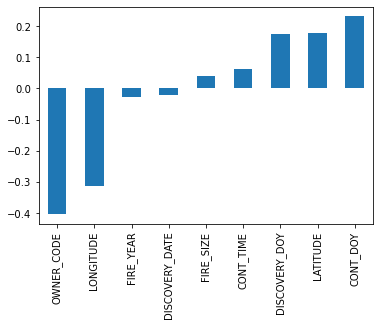

In [15]:
fires.corr()['Lightning'].sort_values().drop(fires2['STAT_CAUSE_DESCR'].unique()).plot.bar()  

<AxesSubplot:>

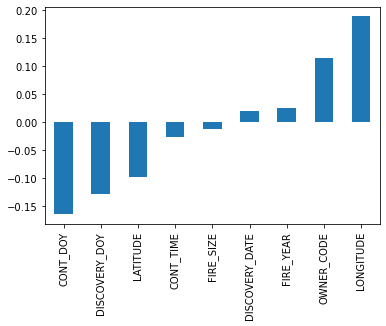

In [16]:
fires.corr()['Debris Burning'].sort_values().drop(fires2['STAT_CAUSE_DESCR'].unique()).plot.bar()  

<AxesSubplot:>

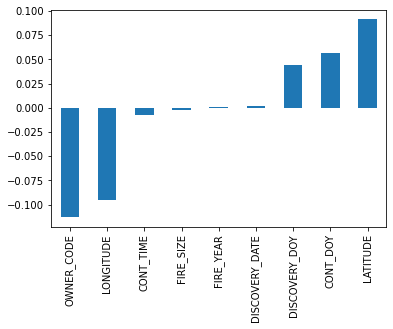

In [17]:
fires.corr()['Campfire'].sort_values().drop(fires2['STAT_CAUSE_DESCR'].unique()).plot.bar()  

<AxesSubplot:>

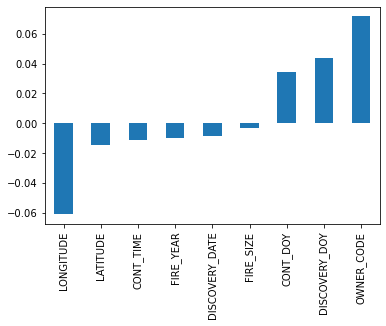

In [18]:
fires.corr()['Equipment Use'].sort_values().drop(fires2['STAT_CAUSE_DESCR'].unique()).plot.bar()  

<AxesSubplot:>

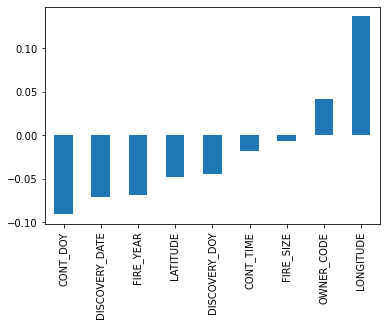

In [19]:
fires.corr()['Arson'].sort_values().drop(fires2['STAT_CAUSE_DESCR'].unique()).plot.bar()  

<AxesSubplot:>

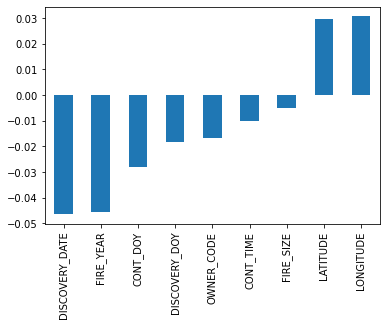

In [20]:
fires.corr()['Children'].sort_values().drop(fires2['STAT_CAUSE_DESCR'].unique()).plot.bar()  

<AxesSubplot:>

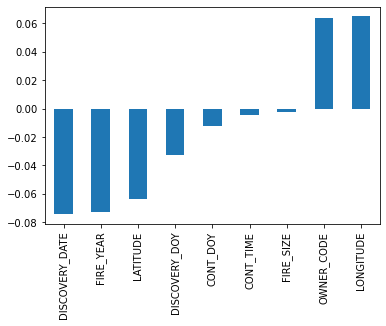

In [21]:
fires.corr()['Railroad'].sort_values().drop(fires2['STAT_CAUSE_DESCR'].unique()).plot.bar()  

<AxesSubplot:>

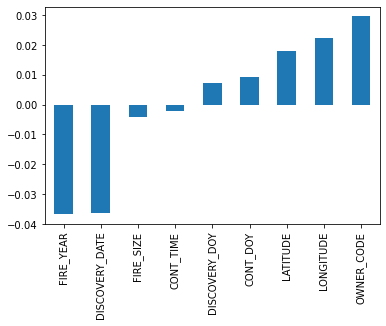

In [22]:
fires.corr()['Smoking'].sort_values().drop(fires2['STAT_CAUSE_DESCR'].unique()).plot.bar()  

<AxesSubplot:>

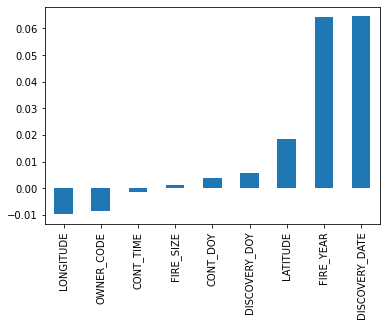

In [23]:
fires.corr()['Powerline'].sort_values().drop(fires2['STAT_CAUSE_DESCR'].unique()).plot.bar()  

<AxesSubplot:>

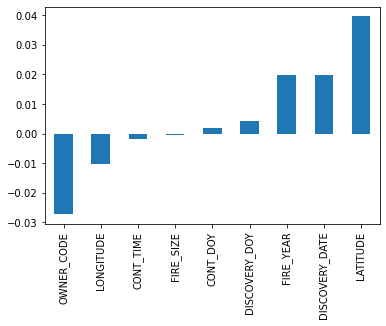

In [24]:
fires.corr()['Structure'].sort_values().drop(fires2['STAT_CAUSE_DESCR'].unique()).plot.bar()  

<AxesSubplot:>

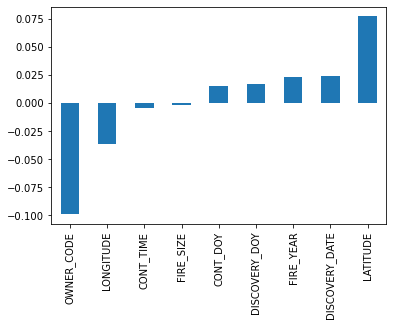

In [25]:
fires.corr()['Fireworks'].sort_values().drop(fires2['STAT_CAUSE_DESCR'].unique()).plot.bar()  

<AxesSubplot:xlabel='STAT_CAUSE_DESCR'>

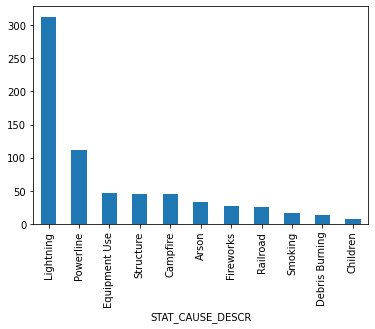

In [26]:
#Mean Fire size by fire type
fires2.groupby(by='STAT_CAUSE_DESCR')['FIRE_SIZE'].describe()['mean'].sort_values(ascending=False).plot.bar() 

<AxesSubplot:xlabel='STAT_CAUSE_DESCR'>

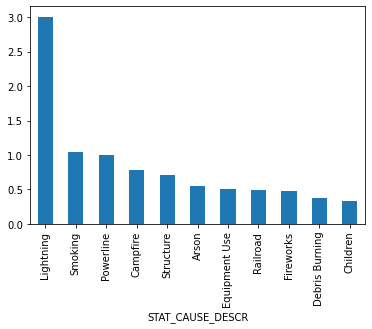

In [27]:
#Mean containment time by fire type
fires2.groupby(by='STAT_CAUSE_DESCR')['CONT_TIME'].describe()['mean'].sort_values(ascending=False).plot.bar() 